Imorting all the library require for the experiment

Imorting all the library require for the experiment

In [1]:
import pandas as pd 
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.neighbors import KernelDensity
import math
import seaborn as sns
from itertools import groupby
import sklearn
import plotly.express as px


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Data importing and preparation about the dataset

In [2]:
allfiles=glob.glob("EyeT/*.csv")


In [3]:
# Reading the questionnairy file for getting the epathy result 
questionnaire_ia = pd.read_csv('QuestionnaireIA.csv', encoding='ISO-8859-1')
# renaming the Participant nr to Participant name as in our dataset we are having Participant name
questionnaire_ia.rename(columns={'Participant nr': 'Participant name'}, inplace=True)


In [4]:

# Columns to check duplicates
columns_to_check = ['Participant name', 'Eye movement type', 'Recording duration', 'Gaze event duration', 'Pupil diameter left', 
                    'Pupil diameter right', 'Gaze point X', 'Gaze point Y']


In [5]:


# Specify the columns for which we identified which can be featues which we can used 
old_features = ['Gaze point X', 'Gaze point Y', 'Gaze point left X', 'Gaze point left Y', 'Gaze point right X', 
                'Gaze point right Y', 'Gaze direction left X', 'Gaze direction left Y', 'Gaze direction left Z', 
                'Gaze direction right X', 'Gaze direction right Y', 'Gaze direction right Z', 'Pupil diameter left', 
    'Pupil diameter right', 'Fixation point X (MCSnorm)', 'Fixation point Y (MCSnorm)'
    , 'Total Score extended', 'Gaze event duration']


In this we are preparing the data and focusion on the column which are important for our analysis

<p> convert the object column and numeriacal string column into the numerical value </p>

In [6]:
import re
import pandas as pd
# fetch the participant name from the file name
def getParticipantNumber(filename):
    match = re.search(r"participant_(\d+)_trial", filename)
    if match:
        return pd.to_numeric(match.group(1))
    return None

# converting the objet and string clumn into numerical value so that we can do the mathemetical analysis on the given data 
def preprocess_column(col):
    if col.dtype == 'O':
        return pd.to_numeric(col.str.replace(',', '.'), errors='coerce')
    elif col.dtype == 'object':
        return pd.to_numeric(col, errors='coerce')
    return col

data_frames = []

# in this we are mearging all the file into one file and also doing the data type conversion also
for filename in allfiles:
    if filename.endswith(".csv"):
        df = pd.read_csv(filename)
        trial_number = int(filename.split('_trial_')[1].split('.')[0])
        participant_number = getParticipantNumber(filename)
        df['Trial'] = trial_number
        df['Participant name'] = participant_number
        df = df.merge(questionnaire_ia[['Participant name', 'Total Score extended']], on='Participant name', how='left')
        # converting only the column which we are going to use in our analysis
        for col in old_features:
            # calling function to convert the column into proper value
            df[col] = preprocess_column(df[col])
        # drop the exact same column
        df.drop_duplicates(subset=columns_to_check, keep='first', inplace=True)
        # drop the unnamed column
        df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')
        
        data_frames.append(df)

data = pd.concat(data_frames, ignore_index=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_3892\3955658898.py:23: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
C:\Users\HP\AppData\Local\Temp\ipykernel_3892\3955658898.py:23: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
C:\Users\HP\AppData\Local\Temp\ipykernel_3892\3955658898.py:23: DtypeWarning: Columns (67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
C:\Users\HP\AppData\Local\Temp\ipykernel_3892\3955658898.py:23: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
C:\Users\HP\AppData\Local\Temp\ipykernel_3892\3955658898.py:23: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
C:\Users\HP\App

 <ul> 
    <li> Handle null values by filling with 0 (you can use other strategies)</li>
</ul>


In [7]:
data =  data.fillna(0) 

<h4> Participants with an even ID-number performed the “foraging for visual information” </h4>
<h4> participants with an odd ID-number performed “gaze typing” </h4>


<p> As we have all the data in a single file so we will divide all the data based on the type of analysis and we have 2 type of data oerfrmed 
    <ul>
    <li> foraging for visual information </l1>
    <li> gaze typing     </li>
</p>

In [8]:
# Define a condition
Group_condition = data['Participant name'] % 2 == 0
# Apply the condition to divide the dataset

<h1> Defining new feature based on the old feature </h1>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Average Gaze Point X:
# The 'Average Gaze Point X' represents the horizontal position on the screen where a person's gaze tends to be 
# centered on average.
# This value is calculated by averaging the raw gaze coordinates of both eyes combined along the horizontal axis.
# It provides insights into the general area of interest that a person focuses on during a task.

# Calculate Average Gaze Point X
data['Average Gaze Point X'] = (data['Gaze point left X'] + data['Gaze point right X']) / 2


# Difference in Gaze Point X between Eyes:
# The 'Difference in Gaze Point X between Eyes' measures the deviation in horizontal gaze coordinates between 
# the left and right eyes.
# It is calculated as the absolute difference between the left eye's gaze point X and the right eye's gaze point X.
# A higher value indicates that the gaze points of the two eyes are more divergent horizontally.

# Calculate Difference in Gaze Point X between Eyes
data['Difference in Gaze Point X between Eyes'] = abs(data['Gaze point left X'] - data['Gaze point right X'])



In [10]:


# . Average Gaze Point X and Y
data['Average Gaze Point X'] = (data['Gaze point X'] + data['Gaze point left X'] + data['Gaze point right X']) / 3
data['Average Gaze Point Y'] = (data['Gaze point Y'] + data['Gaze point left Y'] + data['Gaze point right Y']) / 3

#  Difference in Gaze Point X and Y between Eyes
data['Diff Gaze Point X'] = abs(data['Gaze point left X'] - data['Gaze point right X'])
data['Diff Gaze Point Y'] = abs(data['Gaze point left Y'] - data['Gaze point right Y'])

# Calculate the average of Horizontal and Vertical raw gaze coordinates for both eyes combined. Pixels for both eyes
data['Average Gaze point'] = (data['Gaze point X'] + data['Gaze point Y']) / 2


# Calculate the horizontal gaze span
data['Horizontal Gaze Span'] = data['Gaze point right X'] - data['Gaze point left X']

# Calculate the vertical gaze span
data['Vertical Gaze Span'] = data['Gaze point right Y'] - data['Gaze point left Y']



#  Gaze Angle
data['Gaze Angle'] = np.arccos(
    (data['Gaze direction left X'] * data['Gaze direction right X']) +
    (data['Gaze direction left Y'] * data['Gaze direction right Y']) +
    (data['Gaze direction left Z'] * data['Gaze direction right Z'])
)



# Calculate the average pupil diameter for both eyes
data['Average Fixation point DACS'] = (data['Fixation point X'] + data['Fixation point Y']) / 2



# Calculate the average pupil diameter for both eyes
data['Average Fixation point (MCSnorm)'] = (data['Fixation point X (MCSnorm)'] + data['Fixation point Y (MCSnorm)']) / 2



#  Difference in Pupil Diameter between Eyes
data['Diff Pupil Diameter'] = abs(data['Pupil diameter left'] - data['Pupil diameter right'])


# Calculate the average pupil diameter for both eyes pupil Milimeters
data['Average Pupil Diameter'] = (data['Pupil diameter left'] + data['Pupil diameter right']) / 2

# Validity Ratio
data['Validity Ratio Left'] = data['Validity left'].eq('Valid').astype(int)
data['Validity Ratio Right'] = data['Validity right'].eq('Valid').astype(int)
data['Validity Ratio'] = (data['Validity Ratio Left'] + data['Validity Ratio Right']) / 2

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


making the list of the new features which we get form the old features

In [11]:

new_features = ['Average Pupil Diameter', 'Average Gaze point', 'Average Fixation point DACS', 
                'Horizontal Gaze Span', 'Vertical Gaze Span', 'Average Fixation point (MCSnorm)', 'Average Gaze Point X', 'Average Gaze Point Y', 
                'Diff Gaze Point X', 'Diff Gaze Point Y', 'Average Pupil Diameter', 'Diff Pupil Diameter', 'Gaze Angle', 'Validity Ratio Left', 
                'Validity Ratio Right', 'Validity Ratio']

<h4> merging the old and new column so that we can work on our final feature variable </h4>

In [12]:
features = old_features + new_features
data.sort_values(by='Participant name', ascending=True, inplace=True)

# Create a copy of the original dataset
# copy_data = data

Correlation Analysis:
Calculate and visualize the correlation matrix to understand the relationships between numerical variables.

In [13]:
# Calculate correlation matrix
correlation_matrix = data[new_features+old_features].corr()
# Extract correlation coefficients for the score column

# Plot the correlation matrix
# plt.figure(figsize=(80, 20))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=2)
# plt.title('Correlation Matrix')
# plt.show()



In [14]:

# Extract correlation coefficients for the score column
score_corr = correlation_matrix['Total Score extended']
print(score_corr)


Average Pupil Diameter              0.002972
Average Gaze point                  0.005851
Average Fixation point DACS        -0.009589
Horizontal Gaze Span                0.028791
Vertical Gaze Span                  0.036294
Average Fixation point (MCSnorm)   -0.011881
Average Gaze Point X                0.009452
Average Gaze Point Y               -0.001156
Diff Gaze Point X                  -0.009234
Diff Gaze Point Y                  -0.015507
Average Pupil Diameter              0.002972
Diff Pupil Diameter                -0.002391
Gaze Angle                         -0.009452
Validity Ratio Left                -0.013356
Validity Ratio Right                0.020785
Validity Ratio                      0.005566
Gaze point X                        0.008075
Gaze point Y                       -0.000217
Gaze point left X                  -0.008338
Gaze point left Y                  -0.015221
Gaze point right X                  0.023286
Gaze point right Y                  0.012461
Gaze direc

In [15]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data[features+['Participant name']].drop("Total Score extended",axis=1),
    data["Total Score extended"],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((2936987, 34), (1258709, 34))

In [16]:
X_train.corr()

,Gaze point X,Gaze point Y,Gaze point left X,Gaze point left Y,Gaze point right X,Gaze point right Y,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,...,Average Gaze Point Y,Diff Gaze Point X,Diff Gaze Point Y,Average Pupil Diameter,Diff Pupil Diameter,Gaze Angle,Validity Ratio Left,Validity Ratio Right,Validity Ratio,Participant name
Gaze point X,1.000000,-0.074159,0.716356,-0.095263,0.644185,-0.045820,0.858784,-0.140112,-0.030111,0.832480,...,-0.076911,0.233135,-0.006744,0.016377,0.023425,-0.015672,0.031171,0.038470,0.050384,-0.088060
Gaze point Y,-0.074159,1.000000,-0.062908,0.864390,-0.036291,0.858341,-0.115540,0.716781,-0.001215,-0.095845,...,0.970085,-0.011880,0.271073,-0.024208,0.034364,-0.023878,0.030068,0.030558,0.043828,-0.015994
Gaze point left X,0.716356,-0.062908,1.000000,0.181653,0.381848,-0.086231,0.742919,-0.001200,-0.641357,0.622912,...,0.013566,-0.253246,-0.315533,0.037275,-0.235667,-0.386195,0.644832,-0.087121,0.399031,-0.116522
Gaze point left Y,-0.095263,0.864390,0.181653,1.000000,-0.050776,0.708673,-0.109454,0.765999,-0.394739,-0.063293,...,0.918885,-0.244263,-0.071466,-0.007364,-0.156819,-0.295335,0.424214,-0.003741,0.301539,-0.035099
Gaze point right X,0.644185,-0.036291,0.381848,-0.050776,1.000000,0.250714,0.469240,-0.053866,-0.013572,0.604257,...,0.058950,-0.311683,-0.377220,0.067041,-0.246558,-0.523196,0.006050,0.714356,0.524764,-0.043023
Gaze point right Y,-0.045820,0.858341,-0.086231,0.708673,0.250714,1.000000,-0.104784,0.605848,0.040572,-0.122957,...,0.915073,-0.234338,-0.090723,0.000086,-0.124379,-0.288713,-0.018160,0.424706,0.296383,0.001211
Gaze direction left X,0.858784,-0.115540,0.742919,-0.109454,0.469240,-0.104784,1.000000,-0.186115,-0.033480,0.791934,...,-0.117597,0.086218,-0.021814,0.006858,-0.001681,0.035020,0.030827,-0.068462,-0.027766,-0.213608
Gaze direction left Y,-0.140112,0.716781,-0.001200,0.765999,-0.053866,0.605848,-0.186115,1.000000,-0.135010,-0.172549,...,0.745419,-0.157925,-0.006290,-0.011013,-0.080423,-0.167603,0.180415,0.055898,0.170124,0.139837
Gaze direction left Z,-0.030111,-0.001215,-0.641357,-0.394739,-0.013572,0.040572,-0.033480,-0.135010,1.000000,-0.084472,...,-0.129959,0.550843,0.497024,-0.063817,0.384070,0.676775,-0.995975,0.035922,-0.688184,0.068999
Gaze direction right X,0.832480,-0.095845,0.622912,-0.063293,0.604257,-0.122957,0.791934,-0.172549,-0.084472,1.000000,...,-0.100454,0.129296,-0.004035,0.025369,0.015245,-0.009485,0.078460,-0.077946,-0.000511,-0.182696


using Pearson Correlation to find the important feature for out model evalution

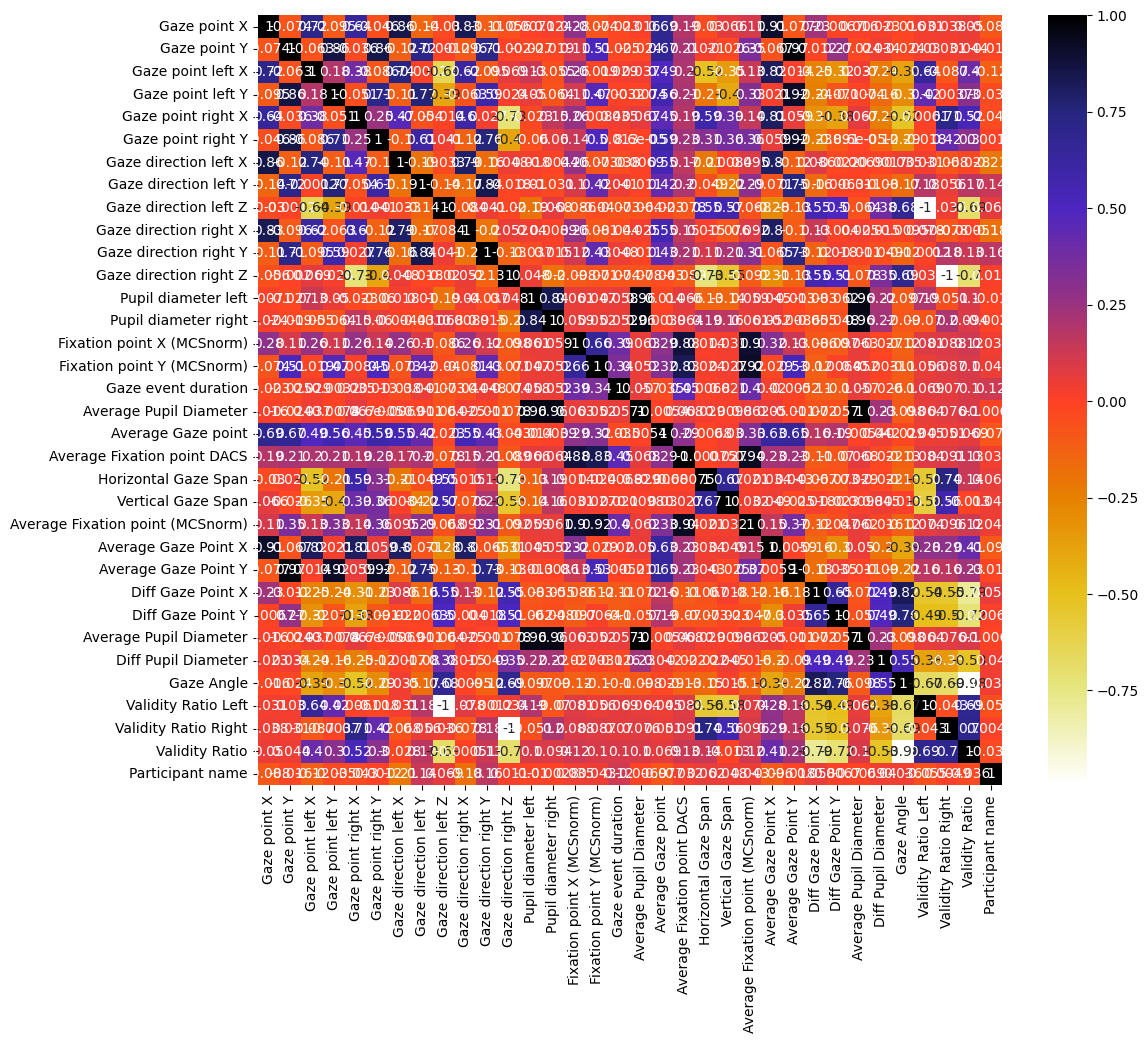

In [17]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [18]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

we are finding highly correlated features

In [19]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

19

In [20]:
corr_features

{'Average Fixation point (MCSnorm)',
 'Average Fixation point DACS',
 'Average Gaze Point X',
 'Average Gaze Point Y',
 'Average Pupil Diameter',
 'Gaze Angle',
 'Gaze direction left X',
 'Gaze direction left Y',
 'Gaze direction right X',
 'Gaze direction right Y',
 'Gaze direction right Z',
 'Gaze point left X',
 'Gaze point left Y',
 'Gaze point right Y',
 'Horizontal Gaze Span',
 'Pupil diameter right',
 'Validity Ratio',
 'Validity Ratio Left',
 'Validity Ratio Right'}

In [21]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,Gaze point X,Gaze point Y,Gaze point right X,Gaze direction left Z,Pupil diameter left,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Gaze event duration,Average Gaze point,Vertical Gaze Span,Diff Gaze Point X,Diff Gaze Point Y,Diff Pupil Diameter,Participant name
3862628,1213.0,482.0,1213.0,0.00000,0.00,0.6326,0.4550,808.0,847.5,482.0,1213.0,482.0,3.33,12
2678020,957.0,536.0,1136.0,-0.99924,0.00,0.0000,0.0000,17.0,746.5,-79.0,357.0,79.0,0.00,7
3924916,955.0,692.0,976.0,-0.97453,0.00,0.5010,0.6387,425.0,823.5,8.0,43.0,8.0,0.00,20
2013364,678.0,199.0,769.0,-0.98954,3.01,0.3116,0.1891,183.0,438.5,-73.0,182.0,73.0,0.00,47
3306688,1053.0,384.0,1059.0,-0.99762,3.52,0.0000,0.0000,8.0,718.5,65.0,12.0,65.0,0.18,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872749,821.0,432.0,905.0,-0.97146,0.00,0.4090,0.4009,192.0,626.5,-20.0,168.0,20.0,0.00,43
4126033,1067.0,120.0,1136.0,-0.99629,4.06,0.5904,0.1019,108.0,593.5,-49.0,138.0,49.0,1.01,50
1326518,998.0,108.0,1075.0,-0.99420,0.00,0.5300,0.1046,608.0,553.0,-42.0,155.0,42.0,0.00,31
524315,1213.0,706.0,0.0,-0.94611,3.61,0.0000,0.0000,58.0,959.5,-706.0,1213.0,706.0,3.61,15


In [22]:
corr_features_score = list(corr_features)
print(corr_features_score)

['Average Fixation point DACS', 'Gaze direction right Z', 'Average Pupil Diameter', 'Gaze point left Y', 'Validity Ratio Right', 'Average Fixation point (MCSnorm)', 'Gaze Angle', 'Average Gaze Point Y', 'Gaze point right Y', 'Gaze point left X', 'Pupil diameter right', 'Gaze direction right X', 'Horizontal Gaze Span', 'Gaze direction left X', 'Average Gaze Point X', 'Validity Ratio Left', 'Validity Ratio', 'Gaze direction left Y', 'Gaze direction right Y']


creating the final dataset with all the important correlation feature which we get from the pearson analysis

In [23]:
final_data = data[corr_features_score + ['Participant name', 'Total Score extended']]
final_data = final_data.fillna(0) 

plotting the correlation matrix

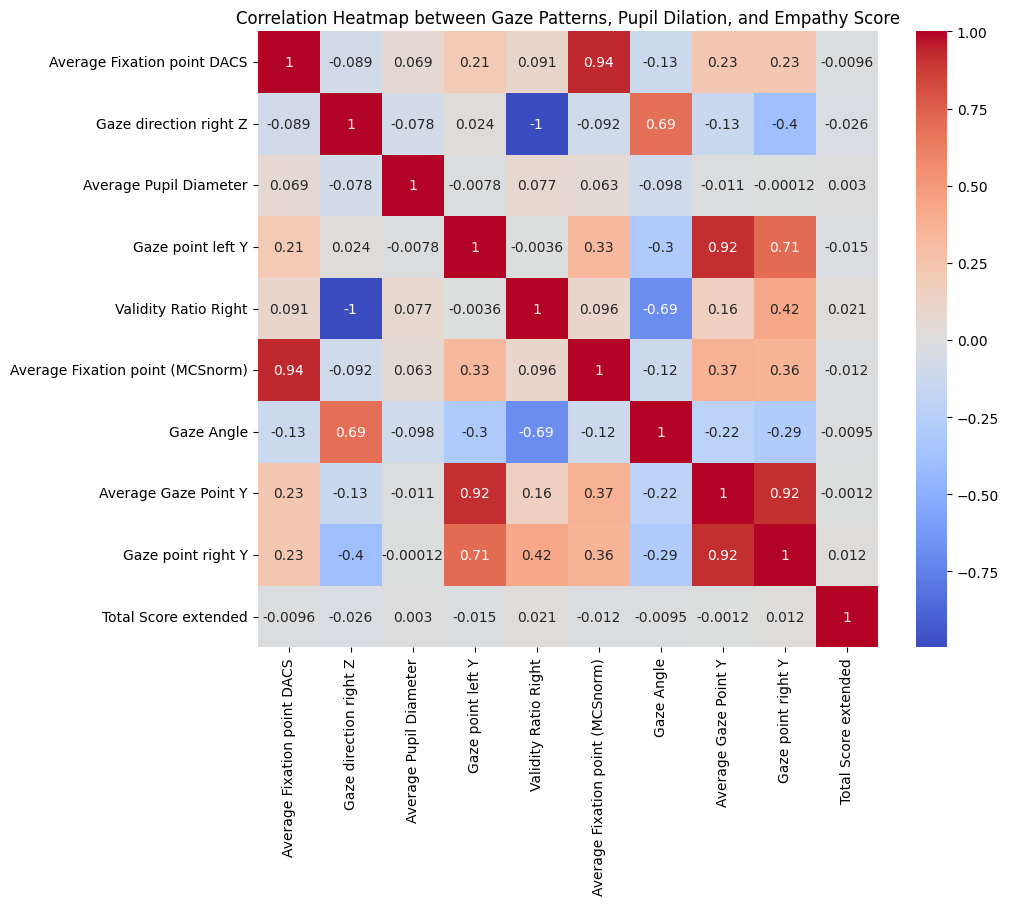

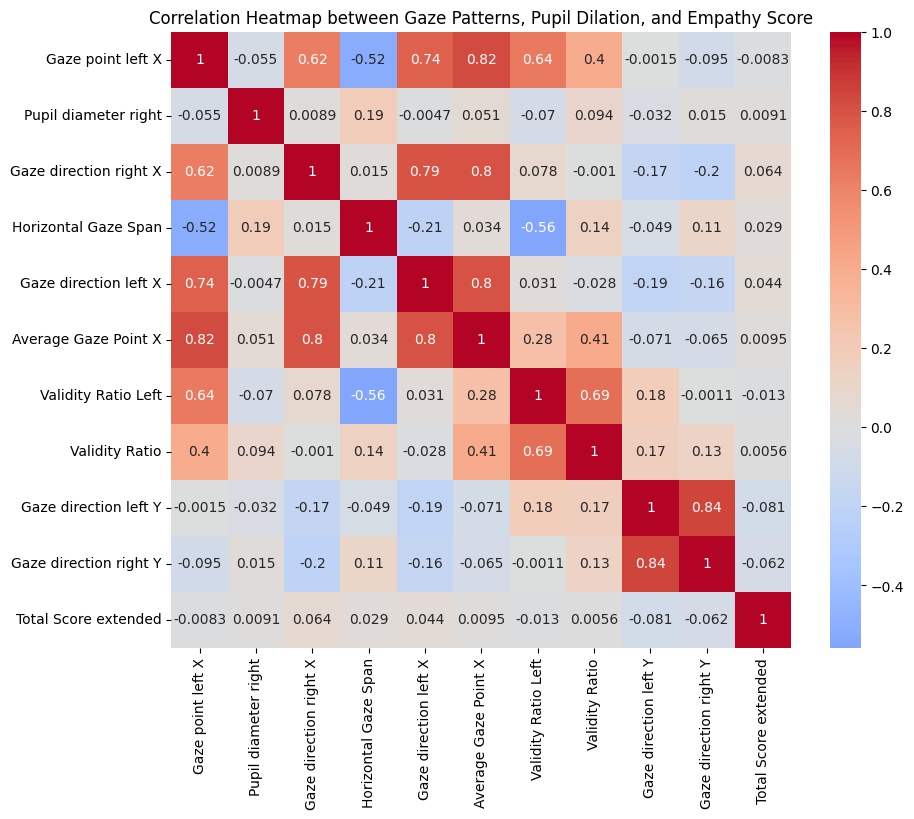

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the midpoint
midpoint = len(corr_features_score) // 2

# Divide the list into two equal parts
first_half = corr_features_score[:midpoint]
second_half = corr_features_score[midpoint:]

# Calculate correlation matrix
correlation_matrix = data[first_half + ['Total Score extended']].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap between Gaze Patterns, Pupil Dilation, and Empathy Score")
plt.show()



# Calculate correlation matrix
correlation_matrix = data[second_half + ['Total Score extended']].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap between Gaze Patterns, Pupil Dilation, and Empathy Score")
plt.show()


In [25]:
# data['Total Score extended']


# Define a condition
Group_condition = final_data['Participant name'] % 2 == 0
# Apply the condition to divide the dataset

# Participants with an even ID-number performed the “foraging for visual information”,                                            
# visual_information = final_data[Group_condition]


# # participants with an odd ID-number performed “gaze typing” 
# gaze_typing = copy_data_final[~Group_condition]

# RandomForestRegressorModel(visual_information, visual_information['Total Score extended'])
# RandomForestRegressorGroupKfold(final_data, final_data['Total Score extended'])


Model Selection and Training:</br>
For this demonstration, i am using regression models:</br>
1: Linear Regression </br>
2: Desicion tree.</br>

<h4> LinearRegression with train and test </h4>

In [26]:
def LinearRegression(final_data):
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LinearRegression
    from sklearn.pipeline import make_pipeline
    from sklearn.metrics import mean_squared_error, r2_score
  
    # Created training and test split
    
    X_train, X_test, y_train, y_test = train_test_split(final_data.drop(columns=['Total Score extended']), final_data['Total Score extended'], test_size=0.3, random_state=42)
    
    # Fit a pipeline using Training dataset and related labels
    
    pipeline = make_pipeline(StandardScaler(), LinearRegression())
    pipeline.fit(X_train, y_train)
    
    # Calculate the predicted value for training and test dataset
    
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Mean Squared Error
    
    print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                    mean_squared_error(y_test, y_test_pred)))
    
    # R-Squared
    
    print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),
                    r2_score(y_test, y_test_pred)))

In [27]:

print("LinearRegression  Regressor:")

print("final_data")
print(LinearRegression(final_data))
print("visual_information")
print(LinearRegression(final_data[Group_condition]))
print("gaze_typing")
print(LinearRegression(final_data[~Group_condition]))

# LinearRegression  Regressor:
# final_data
# MSE train: 109.703, test: 109.443
# R^2 train: 0.039, test: 0.040
# None
# visual_information
# MSE train: 119.654, test: 119.344
# R^2 train: 0.050, test: 0.050
# None
# gaze_typing
# MSE train: 102.624, test: 102.854
# R^2 train: 0.069, test: 0.068
# None

LinearRegression  Regressor:
final_data
MSE train: 109.703, test: 109.443
R^2 train: 0.039, test: 0.040
None
visual_information
MSE train: 119.654, test: 119.343
R^2 train: 0.050, test: 0.050
None
gaze_typing
MSE train: 102.623, test: 102.855
R^2 train: 0.069, test: 0.068
None


<h4> LinearRegression with train and test </br> KFold </br> to find the </br> R^2 Score </br> mean absolute error</h4>


In [28]:
def LinearRegressionKfoldGroupKfold(final_data):  
    from sklearn.model_selection import KFold
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.preprocessing import MinMaxScaler
    import numpy as np


    # Assuming your data is in the variable 'data'
    X = final_data.drop(columns=['Total Score extended'])  # Features
    y = final_data['Total Score extended']  # Target variable

    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Initialize the Linear Regression model
    model = LinearRegression()

    # Initialize KFold with 5 folds
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize lists to store evaluation metrics
    mse_scores = []
    r2_scores = []

    # Loop through each fold
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Scale the features
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Train the model
        model.fit(X_train_scaled, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test_scaled)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Append metrics to lists
        mse_scores.append(mse)
        r2_scores.append(r2)

    # Calculate mean scores
    mean_mse = sum(mse_scores) / len(mse_scores)
    mean_r2 = sum(r2_scores) / len(r2_scores)

    print(f"Mean Squared Error (MSE): {mean_mse}")
    print(f"Mean R^2 Score: {mean_r2}")



In [29]:

print("LinearRegression Regressor:")

print("final_data")
print(LinearRegressionKfoldGroupKfold(final_data))
print("visual_information")
print(LinearRegressionKfoldGroupKfold(final_data[Group_condition]))
print("gaze_typing")
print(LinearRegressionKfoldGroupKfold(final_data[~Group_condition]))
# LinearRegression Regressor:
# final_data
# Mean MAE: 9.860896545675676
# R^2 score: -0.31376067792333284

# LinearRegression Regressor:
# final_data
# Mean MSE: 124.66928029893816
# Mean R2 Score: -0.24748921007791563
# None

# LinearRegression Regressor:
# final_data
# Mean Squared Error (MSE): 109.62632960472963
# Mean R^2 Score: 0.039425863737394165
# None
# visual_information
# Mean Squared Error (MSE): 119.56749601798958
# Mean R^2 Score: 0.05035007889783594
# None
# gaze_typing
# Mean Squared Error (MSE): 102.69401777675239
# Mean R^2 Score: 0.06879969805080514
# None

LinearRegression Regressor:
final_data
Mean Squared Error (MSE): 109.6263163423005
Mean R^2 Score: 0.03942597973124547
None
visual_information
Mean Squared Error (MSE): 119.56793120250688
Mean R^2 Score: 0.050346612721495584
None
gaze_typing
Mean Squared Error (MSE): 102.69398626206505
Mean R^2 Score: 0.06879998415045926
None



<h4> Decision Tress Regressor </br> to find the </br> R^2 Score </br> mean absolute error</h4>

In [30]:
def DecisionTreeRegressor(final_data):
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import mean_squared_error, r2_score
    # Define the features (X) and target (y)
    # X = final_data.drop(columns=['Total Score extended'])

    # y = final_data['Total Score extended']  # Assuming 'Empathy_Score' is the target column

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(final_data.drop(columns=['Total Score extended']), final_data['Total Score extended'], test_size=0.2, random_state=42)

    # Apply MinMax scaling to features
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize Decision Tree model
    model = DecisionTreeRegressor(random_state=42)

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_scaled)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

    # Calculate R-squared (R2) score
    r2 = r2_score(y_test, y_pred)
    print("R-squared:", r2)


In [31]:


print("Decision Tree  Regressor:")

print("final_data")
print(DecisionTreeRegressor(final_data))

print("visual_information")
print(DecisionTreeRegressor(final_data[Group_condition]))

print("gaze_typing")
print(DecisionTreeRegressor(final_data[~Group_condition]))

# 2 min
# Decision Tree  Regressor:
# final_data
# Mean Squared Error: 0.0
# R-squared: 1.0
# None
# visual_information
# Mean Squared Error: 0.0
# R-squared: 1.0
# None
# gaze_typing
# Mean Squared Error: 0.0
# R-squared: 1.0
# None

Decision Tree  Regressor:
final_data


Mean Squared Error: 0.0
R-squared: 1.0
None
visual_information
Mean Squared Error: 0.0
R-squared: 1.0
None
gaze_typing
Mean Squared Error: 0.0
R-squared: 1.0
None


Decision Tree  Regressor:
final_data
Mean Squared Error: 0.0
R-squared: 1.0
None
visual_information
Mean Squared Error: 0.0
R-squared: 1.0
None
gaze_typing
Mean Squared Error: 0.0
R-squared: 1.0
None

<h3> Decision Tress Regressor  K fold  </br> to find the </br> R^2 Score </br> mean absolute error</h3>

In [32]:
def DecisionTreeRegressorKfoldGroup(final_data):
    
    from sklearn.model_selection import KFold
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.preprocessing import MinMaxScaler
    import numpy as np

    # Load and preprocess data
    # X, y = load_and_preprocess_data()  # Replace with your data loading/preprocessing code
    X =  final_data.drop(columns=['Total Score extended'])
    y = final_data['Total Score extended']

    # Apply MinMaxScaler
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Reset indices to avoid alignment issues
    X = pd.DataFrame(X_scaled, columns=X.columns)
    y = y.reset_index(drop=True)

    # Initialize model and cross-validation
    model = DecisionTreeRegressor(random_state=42)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Adjust number of splits as needed

    mse_scores = []
    r2_scores = []

    # Perform k-fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        mse_scores.append(mse)
        r2_scores.append(r2)

    # Calculate average scores
    avg_mse = np.mean(mse_scores)
    avg_r2 = np.mean(r2_scores)

    print("Average MSE:", avg_mse)
    print("Average R2 Score:", avg_r2)


In [33]:

print("Decision Tree  Regressor:")

print("final_data")
print( DecisionTreeRegressorKfoldGroup(final_data))

Decision Tree  Regressor:
final_data
Average MSE: 0.0
Average R2 Score: 1.0
None


In [34]:

print("visual_information")
visual_information = final_data[Group_condition]
print(visual_information.shape)
print(DecisionTreeRegressorKfoldGroup(visual_information))

print("gaze_typing")
gaze_typing = final_data[~Group_condition]
print(gaze_typing.shape)

print(DecisionTreeRegressorKfoldGroup(gaze_typing))

visual_information
(910614, 21)
Average MSE: 7.02825578458396e-05
Average R2 Score: 0.9999994407345592
None
gaze_typing
(3285082, 21)
Average MSE: 0.0
Average R2 Score: 1.0
None


In [35]:

print("visual_information")
visual_information = final_data[Group_condition]
print(visual_information.shape)
print(DecisionTreeRegressorKfoldGroup(visual_information))

print("gaze_typing")
gaze_typing = final_data[~Group_condition]
print(gaze_typing.shape)

print(DecisionTreeRegressorKfoldGroup(gaze_typing))

visual_information
(910614, 21)
Average MSE: 7.02825578458396e-05
Average R2 Score: 0.9999994407345592
None
gaze_typing
(3285082, 21)
Average MSE: 0.0
Average R2 Score: 1.0
None
